In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [3]:
data = data.rename(columns={'charges_2 (%)': 'charges_2'})

In [4]:
df_trial = data.drop(["Product_id", "instock_date", "Customer_name", "Market_Category"], axis = 1)
df_trial = df_trial.dropna(subset=['Selling_Price'])
df_trial.head()

,Stall_no,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price
0,37.0,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
df_trial.describe()

,Stall_no,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price
count,6322.000000,6327.000000,6327.000000,6290.000000,6129.000000,6123.000000,6289.000000,5986.000000,6327.000000
mean,25.312243,0.644065,50.922554,0.140064,264.657203,10.152866,3533.844490,6436.084698,4563.242592
std,14.331376,1.025477,29.090574,0.347081,124.530510,4.317195,2193.700577,3717.051208,2979.102408
min,1.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1882.000000,3922.250000,2450.005280
50%,25.000000,0.000000,51.000000,0.000000,253.000000,10.000000,3164.000000,5638.500000,4210.384640
75%,37.000000,2.000000,76.000000,0.000000,315.000000,14.000000,4697.000000,8126.750000,6167.643252
max,50.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [6]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6322 non-null   float64
 1   Loyalty_customer  6327 non-null   object 
 2   Product_Category  6327 non-null   object 
 3   Grade             6327 non-null   int64  
 4   Demand            6327 non-null   int64  
 5   Discount_avail    6290 non-null   float64
 6   charges_1         6129 non-null   float64
 7   charges_2         6123 non-null   float64
 8   Minimum_price     6289 non-null   float64
 9   Maximum_price     5986 non-null   float64
 10  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 593.2+ KB


In [7]:
corr_matrix = df_trial.corr()
corr_matrix['Selling_Price'].sort_values(ascending = False)

Selling_Price     1.000000
Maximum_price     0.766928
Minimum_price     0.700444
Grade             0.086450
charges_1         0.053045
Stall_no          0.011733
charges_2         0.009031
Demand           -0.000601
Discount_avail   -0.512457
Name: Selling_Price, dtype: float64

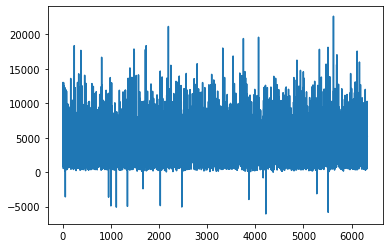

In [8]:
sp = np.array(df_trial.Selling_Price)
plt.plot(sp)
plt.show()

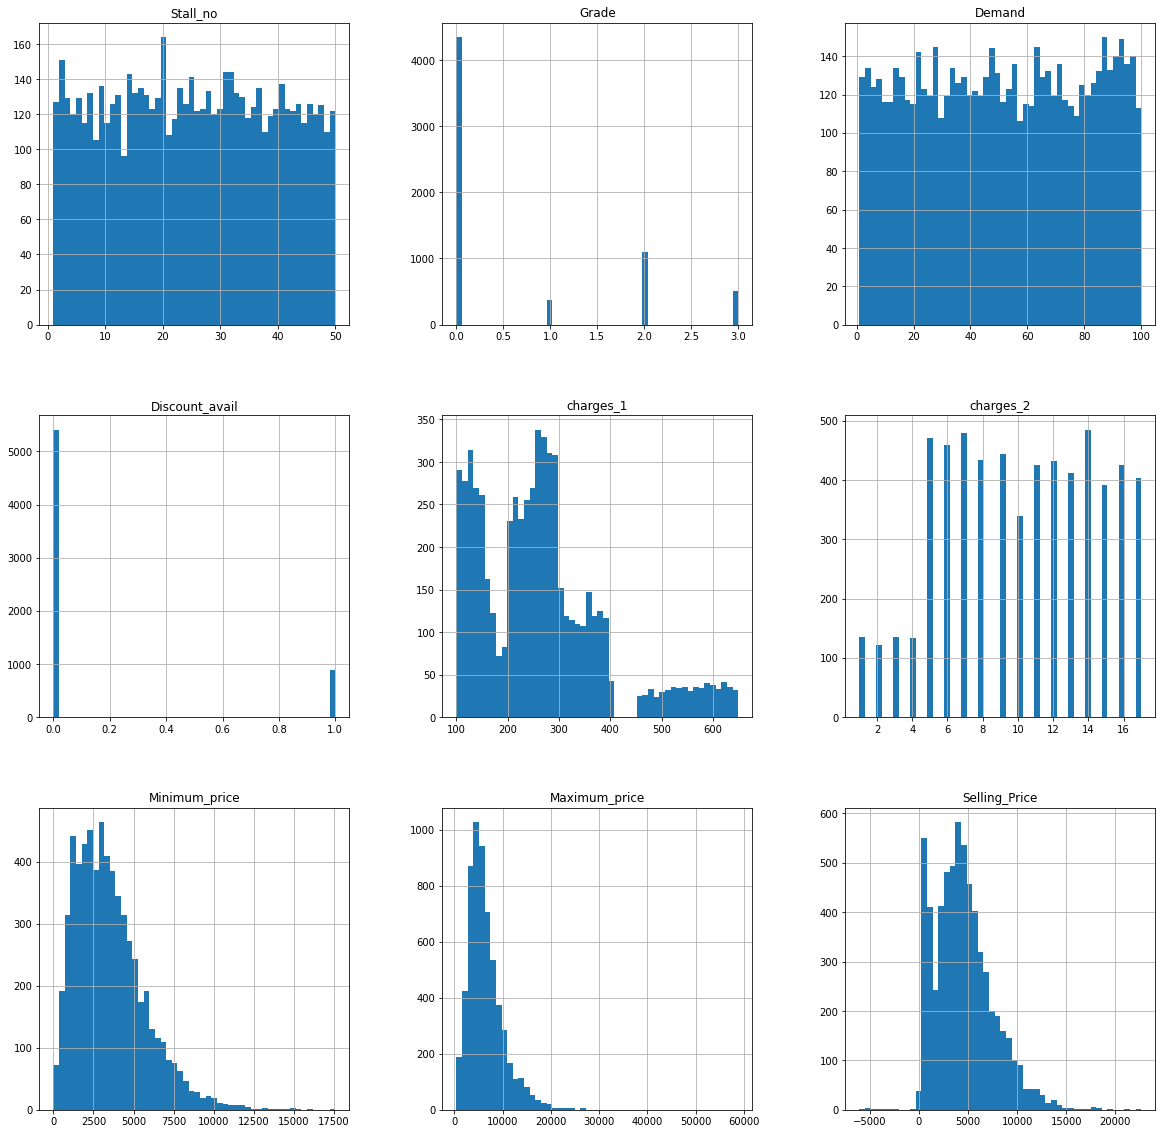

In [9]:
df_trial.hist(bins= 50, figsize= (20,20))
plt.show()

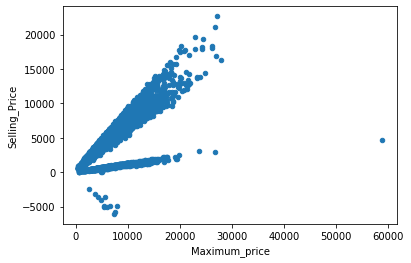

In [10]:
df_trial.plot(kind = "scatter", x = "Maximum_price", y = "Selling_Price")
plt.show()

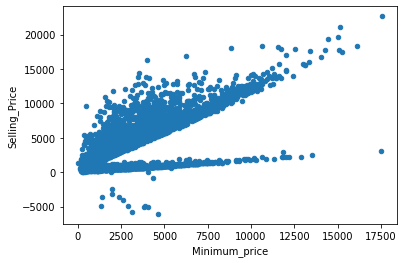

In [11]:
df_trial.plot(kind = "scatter", x = "Minimum_price", y = "Selling_Price")
plt.show()

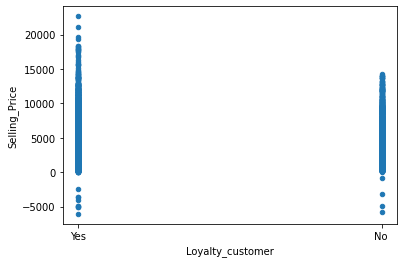

In [12]:
df_trial.plot(kind = "scatter", x = "Loyalty_customer", y = "Selling_Price")
plt.show()

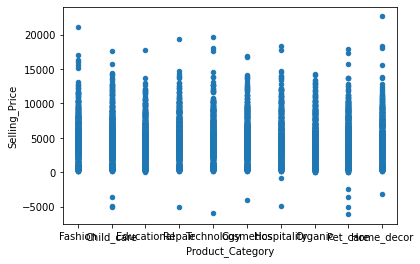

In [13]:
df_trial.plot(kind = "scatter", x = "Product_Category", y = "Selling_Price")
# plt.show()

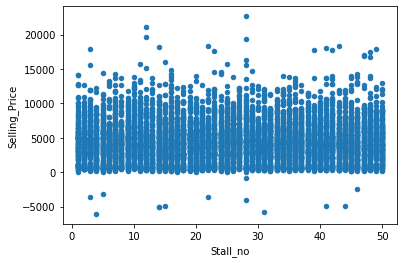

In [14]:
df_trial.plot(kind = "scatter", x = "Stall_no", y = "Selling_Price")
plt.show()

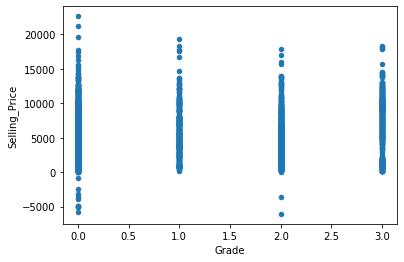

In [15]:
df_trial.plot(kind = "scatter", x = "Grade", y = "Selling_Price")
plt.show()

In [16]:
df_trial[df_trial.Discount_avail == 0.0].Selling_Price.describe()

count     5409.000000
mean      5185.801652
std       2757.195130
min      -6062.470000
25%       3251.540775
50%       4679.155800
75%       6632.585344
max      22638.325941
Name: Selling_Price, dtype: float64

In [17]:
df_trial[df_trial.Discount_avail == 1.0].Selling_Price.describe()

count     881.000000
mean      781.323211
std       420.380255
min      -822.810319
25%       496.079640
50%       711.419351
75%       979.786665
max      4724.948025
Name: Selling_Price, dtype: float64

In [18]:
df_trial.Discount_avail.value_counts()

0.0    5409
1.0     881
Name: Discount_avail, dtype: int64

In [19]:
df_trial.Discount_avail = df_trial.Discount_avail.fillna(0.0)

In [20]:
df_trial.charges_1 = df_trial.charges_1.fillna(253.0)

In [21]:
df_trial.charges_2 = df_trial.charges_2.fillna(10.0)

In [22]:
df_trial.Minimum_price = df_trial.Minimum_price.fillna(3164.0)

In [23]:
df_trial.Maximum_price = df_trial.Maximum_price.fillna(5638.5)

In [24]:
df_trial.Stall_no = df_trial.Stall_no.fillna(25.0)

In [25]:
for index, row in df_trial.iterrows():
    customer = row['Loyalty_customer']
    if customer == "Yes":
        customer = 1.0
    else:
        customer = 0.0
    df_trial.loc[index, 'Loyalty_customer'] = customer

In [26]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6327 non-null   float64
 1   Loyalty_customer  6327 non-null   object 
 2   Product_Category  6327 non-null   object 
 3   Grade             6327 non-null   int64  
 4   Demand            6327 non-null   int64  
 5   Discount_avail    6327 non-null   float64
 6   charges_1         6327 non-null   float64
 7   charges_2         6327 non-null   float64
 8   Minimum_price     6327 non-null   float64
 9   Maximum_price     6327 non-null   float64
 10  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 913.2+ KB


In [27]:
df_trial.head()

,Stall_no,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price
0,37.0,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [28]:
X = df_trial.drop(['Selling_Price'], axis = 1)
Y = df_trial['Selling_Price']
Y = np.array(Y)

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
column_trans = make_column_transformer(
                (OneHotEncoder(), ['Product_Category']), 
                remainder = "passthrough")

In [30]:
X = column_trans.fit_transform(X)

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 11)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_depth': [40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4]}


In [74]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 104.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [75]:
rf_random.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1400}

# Test Data

In [76]:
test = pd.read_csv('test.csv')
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [77]:
test_df = test.rename(columns={'charges_2 (%)': 'charges_2'})
test_df = test_df.drop(["Product_id", "instock_date", "Customer_name", "Market_Category"], axis = 1)

In [78]:
test_df.head()

,Stall_no,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price
0,39.0,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,49.0,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,1.0,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,8.0,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,33.0,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [79]:
test_df.describe()

,Stall_no,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price
count,3429.000000,3430.000000,3430.000000,3430.000000,3394.000000,3425.000000,3416.000000,3430.000000
mean,25.633421,0.667638,49.917493,0.146356,265.484973,10.436204,3444.206089,6234.062391
std,14.389747,1.045914,28.587214,0.353514,125.325455,4.232382,2178.418557,3575.968650
min,1.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,163.000000
25%,13.000000,0.000000,26.000000,0.000000,162.000000,7.000000,1834.000000,3819.000000
50%,26.000000,0.000000,50.000000,0.000000,252.000000,11.000000,3060.500000,5431.000000
75%,38.000000,2.000000,74.000000,0.000000,319.000000,14.000000,4606.500000,7796.500000
max,50.000000,3.000000,100.000000,1.000000,648.000000,17.000000,17182.000000,27954.000000


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3429 non-null   float64
 1   Loyalty_customer  3430 non-null   object 
 2   Product_Category  3430 non-null   object 
 3   Grade             3430 non-null   int64  
 4   Demand            3430 non-null   int64  
 5   Discount_avail    3430 non-null   int64  
 6   charges_1         3394 non-null   float64
 7   charges_2         3425 non-null   float64
 8   Minimum_price     3416 non-null   float64
 9   Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 268.1+ KB


In [81]:
test_df.Stall_no = test_df.Stall_no.fillna(26.0)

In [82]:
test_df.charges_1 = test_df.charges_1.fillna(252)

In [83]:
test_df.charges_2 = test_df.charges_2.fillna(11)

In [84]:
test_df.Minimum_price = test_df.Minimum_price.fillna(3060.50)

In [85]:
for index, row in test_df.iterrows():
    customer = row['Loyalty_customer']
    if customer == "Yes":
        customer = 1.0
    else:
        customer = 0.0
    test_df.loc[index, 'Loyalty_customer'] = customer

In [86]:
test_df.head()

,Stall_no,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price
0,39.0,0,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,49.0,1,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,1.0,0,Technology,2,55,0,493.0,9.0,7175.0,15715
3,8.0,1,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,33.0,0,Technology,0,27,0,567.0,16.0,4069.0,6244


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   float64
 1   Loyalty_customer  3430 non-null   object 
 2   Product_Category  3430 non-null   object 
 3   Grade             3430 non-null   int64  
 4   Demand            3430 non-null   int64  
 5   Discount_avail    3430 non-null   int64  
 6   charges_1         3430 non-null   float64
 7   charges_2         3430 non-null   float64
 8   Minimum_price     3430 non-null   float64
 9   Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 268.1+ KB


In [88]:
test_df = column_trans.fit_transform(test_df)

In [89]:
# test_df = preprocessing.scale(test_df)

In [90]:
y_grid = rf_random.predict(test_df)

In [91]:
if min(y_grid) < 0:
    y_grid[y_grid < 0] = 124

In [92]:
np.savetxt('ans_grid.csv', y_grid, delimiter = ',')